# Import Packages

In [13]:
import pyforest

# Data Handling

In [14]:
path = '..\data\BankNote_Authentication.csv'
df = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [15]:
df.head(2)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
X.shape, y.shape

((1372, 4), (1372,))

In [16]:
df['class'].unique()

array([0, 1], dtype=int64)

In [17]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

<AxesSubplot:>

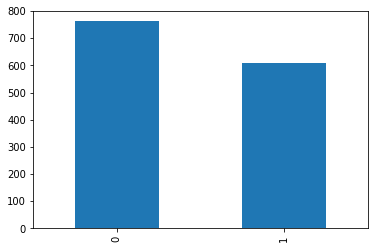

In [18]:
df['class'].value_counts().plot.bar()

# Data split

In [19]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

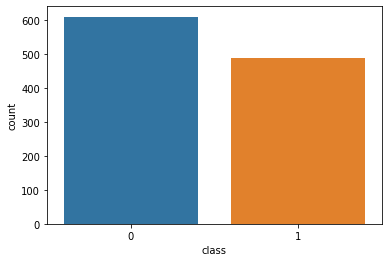

In [33]:
sns.countplot(y_train)

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

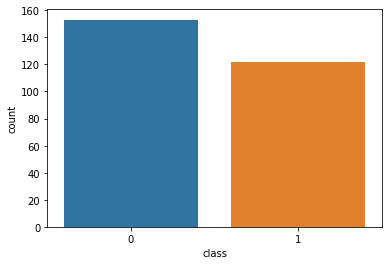

In [34]:
sns.countplot(y_test)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1097, 4), (1097,), (275, 4), (275,))

# Model

## training

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
%%time
model = RandomForestClassifier()
model.fit(X_train, y_train)

Wall time: 696 ms


RandomForestClassifier()

## Prediction

In [38]:
y_pred = model.predict(X_test)

## Metrics

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print(accuracy_score(y_test, y_pred))

0.9963636363636363


## Save the Model

In [44]:
import pickle
model_out = open(r'..\model_pkl\rf_bank_note_classifier.pkl', 'wb')
pickle.dump(model, model_out)
model_out.close()